In [2]:
%matplotlib inline

# Bokeh for interactive, Seaborn for static

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob

In [3]:
fsm01_param_files = '../experiments/fsm-0-1/seed*/outcmaesxrecentbest.dat'
bnn01_param_files = '../experiments/bnn-0-1/seed*/outcmaesxrecentbest.dat'

# fsm302_param_files = '../experiments/fsm-30-2/seed*/outcmaesxrecentbest.dat'
# bnn302_param_files = '../experiments/bnn-30-2/seed*/outcmaesxrecentbest.dat'

fsm302_param_files = '../experiments/fsm-40-2/seed*/outcmaesxrecentbest.dat'
bnn302_param_files = '../experiments/bnn-40-2/seed*/outcmaesxrecentbest.dat'
tws302_param_files = '../experiments/bnn_twist-40-2/seed*/outcmaesxrecentbest.dat'

def range_transform(x, a, b, c, d):
    return (x - a) * (d - c) / (b - a) + c

def get_data_from_file(glob_dir, header):
    data = []
    for pop_filepath in sorted(glob.iglob(glob_dir, recursive=True)):
        data.append(pd.read_csv(pop_filepath, comment='%', header=None, names=header, sep=' '))
        data[-1]['fitness'] = (data[-1]['fitness'] * -1) + 1
    return data


cmaes_header = ['iter', 'evals', 'sigma', '0', 'fitness']
fsm_header = cmaes_header + ['param' + str(i)  for i in range(15)]
bnn_header = cmaes_header + ['param' + str(i)  for i in range(17)]


fsm01_replicates = get_data_from_file(fsm01_param_files, fsm_header)
print('Found', len(fsm01_replicates), 'data files in', fsm01_param_files)

fsm302_replicates = get_data_from_file(fsm302_param_files, fsm_header)
print('Found', len(fsm302_replicates), 'data files in', fsm302_param_files)


bnn01_replicates = get_data_from_file(bnn01_param_files, bnn_header)
print('Found', len(bnn01_replicates), 'data files in', bnn01_param_files)

bnn302_replicates = get_data_from_file(bnn302_param_files, bnn_header)
print('Found', len(bnn302_replicates), 'data files in', bnn302_param_files)

tws302_replicates = get_data_from_file(tws302_param_files, bnn_header)
print('Found', len(tws302_replicates), 'data files in', tws302_param_files)

Found 20 data files in ../experiments/fsm-0-1/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/fsm-40-2/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn-0-1/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn-40-2/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn_twist-40-2/seed*/outcmaesxrecentbest.dat


/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/ajc/miniconda

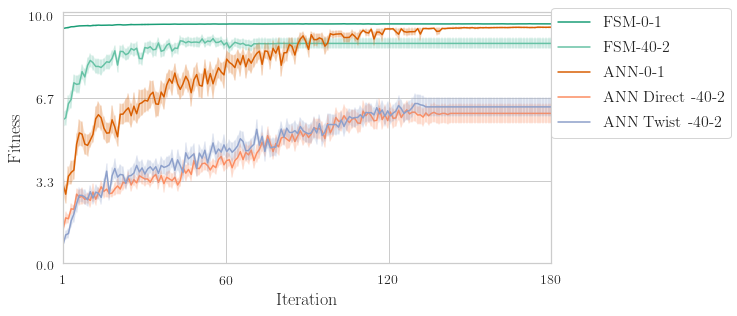

In [10]:
def plot_generational_fitness(dfs, col, name, color, ls):
    data = np.zeros((len(dfs), 2000))

    for i, r in enumerate(dfs):
        data[i, :len(r[col])] = r[col]
        data[i, len(r[col]):] = r[col].iloc[-1]
    # unit_traces is very useful (ci_band and ci_bars are 1 std by default (68%))
    return sns.tsplot(data=data, 
                      color=color,
                      condition=name, ax=ax,
                      err_style=('ci_band', 'ci_bars'))


fsize = 16/2, 9/2
fig, ax = plt.subplots(figsize=fsize)
colors = sns.color_palette("RdBu", n_colors=4)
# ['#fc8d59','#ffffbf','#91bfdb']
# ['#1b9e77','#d95f02','#7570b3']
# ['#66c2a5','#fc8d62','#8da0cb']
colors = sns.color_palette(['#1b9e77','#d95f02','#7570b3','#66c2a5','#fc8d62','#8da0cb'])

plot_generational_fitness(fsm01_replicates, 'fitness', 'FSM-0-1', colors[0], '-')
plot_generational_fitness(fsm302_replicates, 'fitness', 'FSM-40-2', colors[3], '-')
plot_generational_fitness(bnn01_replicates, 'fitness', 'ANN-0-1', colors[1], '--')
plot_generational_fitness(bnn302_replicates, 'fitness', 'ANN Direct -40-2', colors[4], '--')
plot_generational_fitness(tws302_replicates, 'fitness', 'ANN Twist -40-2', colors[5], ':')


gens = 180
ax.set_xlim((0, gens-1))

xticks = np.linspace(0, gens-1, 4)
ax.set_xticks(xticks)
ax.set_xticklabels([int(xval + 1) for xval in xticks], fontsize=14)
ax.set_xlabel('Iteration', fontsize=18)
ax.set_xlim([0, gens - 1])

yticks = np.linspace(0, 10, num=4)
ax.set_yticks(yticks)
ax.set_yticklabels([round(yval, 1) for yval in yticks], fontsize=14)
ax.set_ylabel('Fitness', fontsize=18)

# sns.despine(top=True, bottom=True, left=True, right=True)
# sns.despine(top=True, left=True)
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=(1, 0.5), fontsize=16)#, bbox_to_anchor=(0.5,-0.1))

In [12]:
fig.savefig('fitness.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

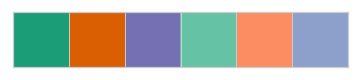

In [13]:
sns.palplot(sns.color_palette(['#1b9e77','#d95f02','#7570b3','#66c2a5','#fc8d62','#8da0cb']))

In [9]:
fsm01_replicates[0].head()

,iter,evals,sigma,0,fitness,param0,param1,param2,param3,param4,param5,param6,param7,param8,param9,param10,param11,param12,param13,param14
0,1,12,1.900941,0,9.440000,0.299406,6.972677,0.377071,8.136137,1.207228,3.706145,8.746990,6.139023,8.420464,0.038142,9.906870,3.172308,9.849905,1.310199,8.851853
1,2,24,1.853928,0,9.520000,1.538103,4.288195,1.555910,6.212588,2.207852,1.488445,9.999898,3.217634,9.011049,0.000077,8.496985,2.713907,9.560029,1.072400,9.934619
2,3,36,1.954579,0,9.550000,1.971245,4.981107,2.786555,5.264303,2.027374,1.905595,9.725210,4.466734,6.212925,0.317228,9.463471,2.993697,9.420879,0.262252,6.347946
3,4,48,1.999952,0,9.543333,0.596676,2.878108,0.824464,5.068973,2.331565,0.006566,9.546305,1.891911,7.957188,0.169710,8.275537,5.661438,9.939748,1.018650,5.714320
4,5,60,2.049174,0,9.556667,1.982281,1.634515,5.722160,0.961972,1.295859,0.601714,9.910844,5.231951,7.153407,0.903139,8.193657,0.266778,9.871282,1.709274,6.645252


In [11]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
